# 2. Visualization

Before going through the classification code, we can take a look on how data looks like. This notebook is based on [YoungGer](https://github.com/YoungGer/Kaggle-DogBreed-Gluon/blob/master/DataOverview.ipynb) and [jeru666](https://www.kaggle.com/jeru666/dog-eat-dog-world-eda-useful-scripts).

## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from mxnet import image as mximg

# With the following, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell 
# that produced it. The resulting plots will then also be stored in the 
# notebook document.
%matplotlib inline

## Setting parameters

In [2]:
data_dir  = "data"
train_dir = "train"
test_dir  = "test"

## Number of images

In [3]:
train_num = len([name for name in os.listdir(os.path.join('.', data_dir, train_dir)) \
    if os.path.isfile(os.path.join(data_dir, train_dir, name))])
test_num = len([name for name in os.listdir(os.path.join('.', data_dir, test_dir)) \
    if os.path.isfile(os.path.join(data_dir, test_dir, name))])

print ("Number of training images: %d" % train_num)
print ("Number of testing timages: %d" % test_num)

Number of training images: 10222
Number of testing timages: 10357


## Label

In [4]:
labels = pd.read_csv(os.path.join('.', data_dir, "labels.csv"))

print ("Number of classes: %d" % len(set(labels.breed)))
print ("Missing labels: " + str(labels.isnull().values.any()))

Number of classes: 120
Missing labels: False


In [5]:
class_freq = labels.breed.value_counts()

In [6]:
class_freq.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [7]:
class_freq.tail()

golden_retriever     67
komondor             67
brabancon_griffon    67
briard               66
eskimo_dog           66
Name: breed, dtype: int64

Text(0.5,1,'Distribution of Dog breeds')

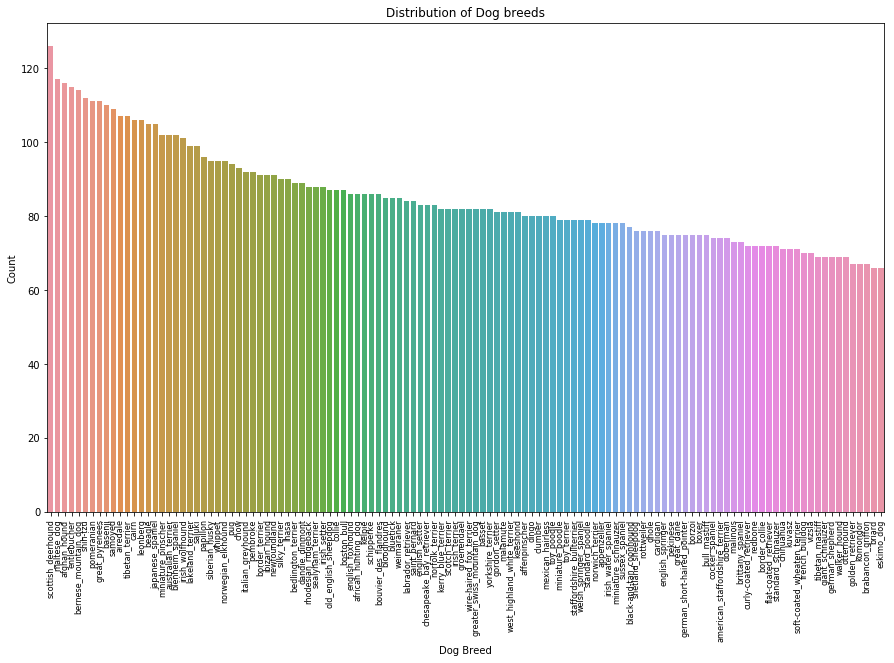

In [8]:
# Source: https://www.kaggle.com/jeru666/dog-eat-dog-world-eda-useful-scripts
yy = pd.value_counts(labels['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')

# Show Data

Image shape:  (480, 533, 3)
Image type :  brabancon_griffon

[[174 170]
 [150 160]]
<NDArray 2x2 @cpu(0)>


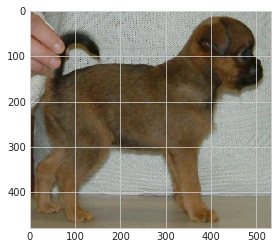

In [9]:
rand_idx  = np.random.randint(len(labels))
img_id    = labels.iloc[rand_idx].id
img_class = labels.iloc[rand_idx].breed
img       = mximg.imread(os.path.join('.', data_dir, train_dir, img_id + ".jpg"))

print ("Image shape: ", img.shape)
print ("Image type : ", img_class)
print (img[:2,:2, 0])
plt.imshow(img.asnumpy())

# Tips

- Images have different size.